In [1]:
# default_exp covid

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [15]:
#export
import pandas as pd
import io
import requests
import matplotlib as plt
import numpy as np
import calendar
from datetime import datetime, timedelta

In [16]:
#hide
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
s=requests.get(url).content
covid=pd.read_csv(io.StringIO(s.decode('utf-8')))

covid.to_csv("covid")
covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [17]:
usa = covid[covid["iso_code"] == "USA"]
usa.tail(20)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
17357,USA,United States,2020-04-30,1039909,27326,60966,2611,3141.694,82.555,184.186,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
17358,USA,United States,2020-05-01,1069826,29917,63006,2040,3232.077,90.383,190.349,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
17359,USA,United States,2020-05-02,1103781,33955,65068,2062,3334.659,102.582,196.578,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
17360,USA,United States,2020-05-03,1133069,29288,66385,1317,3423.142,88.483,200.557,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
17361,USA,United States,2020-05-04,1158041,24972,67682,1297,3498.585,75.444,204.476,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
17362,USA,United States,2020-05-05,1180634,22593,68934,1252,3566.842,68.256,208.258,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
17363,USA,United States,2020-05-06,1204475,23841,71078,2144,3638.868,72.027,214.735,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
17364,USA,United States,2020-05-07,1228603,24128,73431,2353,3711.762,72.894,221.844,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
17365,USA,United States,2020-05-08,1256972,28369,75670,2239,3797.468,85.706,228.608,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
17366,USA,United States,2020-05-09,1283929,26957,77180,1510,3878.909,81.440,233.170,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77


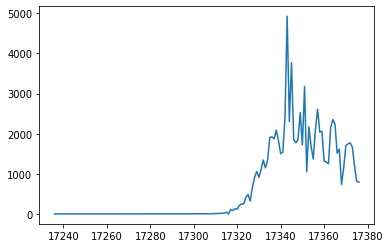

In [18]:
usa.new_deaths.plot()

In [19]:
surl = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
s=requests.get(surl).content
counties=pd.read_csv(io.StringIO(s.decode('utf-8')))
counties.to_csv("counties.csv")
counties.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


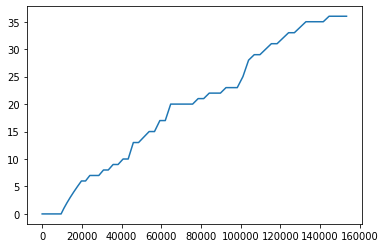

In [20]:
sanfran = counties[counties["county"] == "San Francisco"]
sanfran.deaths.plot()

In [9]:
sanfran.tail(45)

,date,county,state,fips,cases,deaths
28571,2020-04-03,San Francisco,California,6075.0,500,7
30926,2020-04-04,San Francisco,California,6075.0,529,8
33332,2020-04-05,San Francisco,California,6075.0,571,8
35775,2020-04-06,San Francisco,California,6075.0,586,9
38260,2020-04-07,San Francisco,California,6075.0,622,9
40798,2020-04-08,San Francisco,California,6075.0,679,10
43362,2020-04-09,San Francisco,California,6075.0,727,10
45957,2020-04-10,San Francisco,California,6075.0,800,13
48585,2020-04-11,San Francisco,California,6075.0,860,13
51244,2020-04-12,San Francisco,California,6075.0,875,14


In [21]:
sanfran.to_csv("SanFran.csv")

In [22]:
surl = "https://covidtracking.com/api/v1/us/daily.csv"
s=requests.get(surl).content
theatlantic=pd.read_csv(io.StringIO(s.decode('utf-8')))
theatlantic.to_csv("theatlantic.csv")
theatlantic.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200518,56,1499722,10334786.0,3596.0,40933.0,157963.0,10015.0,7064.0,5257.0,...,157963.0,11838104,11834508,11834508,NaN,786.0,1058.0,318456.0,19564.0,338020.0
1,20200517,56,1480158,10016330.0,3449.0,41108.0,156905.0,10164.0,7003.0,5467.0,...,156905.0,11499937,11496488,11496488,NaN,839.0,1179.0,383222.0,20737.0,403959.0
2,20200516,56,1459421,9633108.0,3788.0,42896.0,155726.0,10509.0,6945.0,5529.0,...,155726.0,11096317,11092529,11092529,NaN,1286.0,1860.0,327995.0,24943.0,352938.0
3,20200515,56,1434478,9305113.0,2457.0,42854.0,153866.0,10704.0,6890.0,5746.0,...,153866.0,10742048,10739591,10739591,NaN,1478.0,1295.0,337172.0,24373.0,361545.0
4,20200514,56,1410105,8967941.0,2673.0,44075.0,152571.0,10888.0,6795.0,5940.0,...,152571.0,10380719,10378046,10378046,NaN,1908.0,3224.0,354728.0,26931.0,381659.0


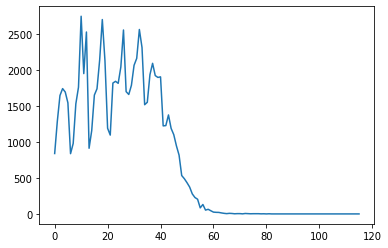

In [12]:
theatlantic.deathIncrease.plot()

In [12]:
theatlantic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      117 non-null    int64  
 1   states                    117 non-null    int64  
 2   positive                  117 non-null    int64  
 3   negative                  79 non-null     float64
 4   pending                   75 non-null     float64
 5   hospitalizedCurrently     62 non-null     float64
 6   hospitalizedCumulative    58 non-null     float64
 7   inIcuCurrently            53 non-null     float64
 8   inIcuCumulative           54 non-null     float64
 9   onVentilatorCurrently     54 non-null     float64
 10  onVentilatorCumulative    47 non-null     float64
 11  recovered                 54 non-null     float64
 12  hash                      117 non-null    object 
 13  dateChecked               117 non-null    object 
 14  death     

In [13]:
#https://www.apple.com/covid19/mobility
currentDay  = "2020-05-16"

In [14]:
surl = "https://covid19-static.cdn-apple.com/covid19-mobility-data/2008HotfixDev28/v2/en-us/applemobilitytrends-"+ currentDay + ".csv"
s=requests.get(surl).content
mobility=pd.read_csv(io.StringIO(s.decode('utf-8')))
mobility.to_csv("mobility.csv")
mobility.head()

ParserError: Error tokenizing data. C error: Expected 3 fields in line 5, saw 6


In [16]:
California = mobility[mobility["region"] == "San Francisco - Bay Area"]
California.tail()

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15
486,city,San Francisco - Bay Area,driving,NaN,100.0,104.21,106.18,106.36,122.64,113.41,...,53.20,55.21,63.30,59.81,48.58,NaN,NaN,57.35,59.42,70.27
487,city,San Francisco - Bay Area,transit,NaN,100.0,101.59,104.05,97.69,115.19,108.10,...,23.03,23.45,24.06,22.70,18.61,NaN,NaN,22.42,22.81,24.40
488,city,San Francisco - Bay Area,walking,NaN,100.0,106.46,98.83,74.53,99.76,119.78,...,32.98,33.80,38.05,38.82,30.53,NaN,NaN,36.69,37.63,47.14


In [17]:
records = California.to_dict('records')
sample = records[0]
sample

{'geo_type': 'city',
 'region': 'San Francisco - Bay Area',
 'transportation_type': 'driving',
 'alternative_name': nan,
 '2020-01-13': 100.0,
 '2020-01-14': 104.21,
 '2020-01-15': 106.18,
 '2020-01-16': 106.36,
 '2020-01-17': 122.64,
 '2020-01-18': 113.41,
 '2020-01-19': 88.8,
 '2020-01-20': 93.39,
 '2020-01-21': 104.98,
 '2020-01-22': 107.24,
 '2020-01-23': 107.3,
 '2020-01-24': 119.47,
 '2020-01-25': 109.95,
 '2020-01-26': 83.02,
 '2020-01-27': 95.83,
 '2020-01-28': 101.08,
 '2020-01-29': 102.55,
 '2020-01-30': 107.28,
 '2020-01-31': 119.84,
 '2020-02-01': 109.55,
 '2020-02-02': 77.61,
 '2020-02-03': 95.55,
 '2020-02-04': 100.86,
 '2020-02-05': 102.7,
 '2020-02-06': 109.42,
 '2020-02-07': 121.05,
 '2020-02-08': 115.31,
 '2020-02-09': 89.9,
 '2020-02-10': 101.77,
 '2020-02-11': 106.75,
 '2020-02-12': 109.2,
 '2020-02-13': 118.5,
 '2020-02-14': 134.38,
 '2020-02-15': 115.94,
 '2020-02-16': 95.72,
 '2020-02-17': 95.19,
 '2020-02-18': 107.0,
 '2020-02-19': 105.28,
 '2020-02-20': 109.61,

In [18]:
startDate = datetime(year=2020,month=1,day=1)
endDate = datetime.today()

def keyFromDate(d):
    return str(d.year) + "-" + d.strftime('%m-%d')
    return str(d.year) + "-" + str( d.month) + "-" + str(d.day)

def processSample(x):
    arr = []
    currentDate = startDate
    delta = timedelta(days=1)
    while keyFromDate(currentDate) !=  keyFromDate(endDate):
        key =  keyFromDate(currentDate)
        #print(key)
        if  key in x:
            arr.append(x[key])
        else:
            arr.append(np.nan)
        currentDate += delta
    return arr #{x['transportation_type']:arr}

def processTable(y):
    ret = {}
    dateRange = []
    dateKeys = []
    currentDate = startDate
    delta = timedelta(days=1)
    while keyFromDate(currentDate) !=  keyFromDate(endDate):
        key =  keyFromDate(currentDate)
        dateKeys.append(calendar.day_name[currentDate.weekday()])
        dateRange.append(currentDate)
        currentDate += delta
    ret = {"keys": dateKeys,"date":dateRange}
    for x in y:
        ret[x['transportation_type']] = processSample(x)
    return pd.DataFrame.from_dict(ret)

mob = processTable(records)
mob.to_csv("SanFranMob.csv")
mob.tail(50)

,keys,date,driving,transit,walking
87,Saturday,2020-03-28,34.93,15.46,21.85
88,Sunday,2020-03-29,29.66,17.89,20.15
89,Monday,2020-03-30,38.06,21.95,24.66
90,Tuesday,2020-03-31,39.25,22.88,25.59
91,Wednesday,2020-04-01,39.29,22.52,25.83
92,Thursday,2020-04-02,38.93,21.29,24.99
93,Friday,2020-04-03,44.40,22.66,27.75
94,Saturday,2020-04-04,35.34,14.80,20.44
95,Sunday,2020-04-05,27.59,16.69,16.31
96,Monday,2020-04-06,34.63,19.14,19.16


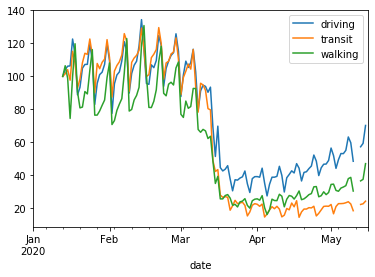

In [21]:
mob.plot(x='date', y=['driving','transit','walking'])